### EDA of loan approval dataset

##### Problem statement:
What are the factors affecting approval of loan? How likely is a loan to be approved if you have a good credit history or pay rent for housing or have a low risk score for your loan?
A thorough examination of the dataset below helps us understand such aspects when it comes to approval of our loans. 

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import plot

#### View dataset

In [192]:
df = pd.read_csv('loan_dataset.csv')
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


#### View datatypes of each column

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

- Datatypes for each column seem to be correct by default

#### Check for missing values

In [194]:
df.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

- There are no missind data in this dataset.

#### View the characteristics of categorical and numerical variables

In [195]:
df.describe(include=['object'])

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,58645,58645,58645,58645
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,30594,12271,20984,49943


- There are few unique values for categorical columns

In [196]:
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


Outliers seem to be present in:
- person_age, person_emp_length and person_income columns

#### View outliers

In [197]:
# View the maximum 5 values
def view_max_values(df, columns, n=5):
    max_values = {}
    for col in columns:
        max_values[col] = df[col].nlargest(n)
    return max_values

max_values = view_max_values(df, ['person_age', 'person_income', 'person_emp_length'])

for col, values in max_values.items():
    print(f"Maximum 5 values in column '{col}':")
    print(values)

Maximum 5 values in column 'person_age':
47336    123
4962      84
6750      84
15588     80
21953     80
Name: person_age, dtype: int64
Maximum 5 values in column 'person_income':
17387    1900000
12404    1839784
37591    1824000
2093     1200000
19060    1200000
Name: person_income, dtype: int64
Maximum 5 values in column 'person_emp_length':
41079    123.0
49252    123.0
9997      41.0
26125     41.0
50559     39.0
Name: person_emp_length, dtype: float64


#### Drop outliers:

In [198]:
df = df[df['person_age'] != 123]
df = df[df['person_emp_length'] != 123]
df = df[df['person_income'] <= 1000000]

#### Analysis of numerical variables

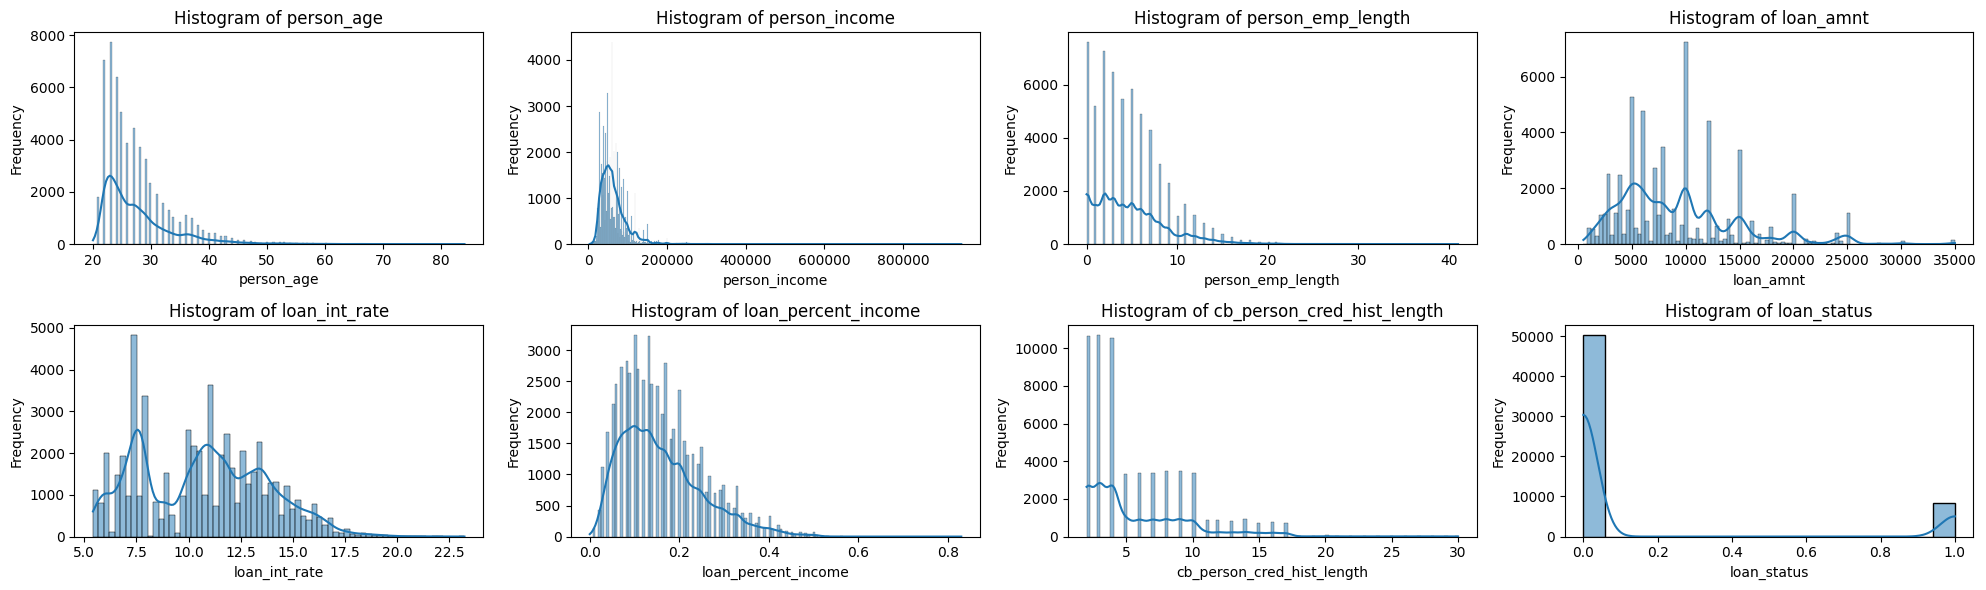

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate numerical columns
numerical_columns = [col for col in df.columns if df[col].dtype in ['int64', 'float64'] and col != 'id']

# Calculate the number of rows and columns for the grid
num_plots = len(numerical_columns)
num_cols = 4  # Number of columns in the grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create a grid of subplots with reduced row height
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 3 * num_rows))  # Reduced height (3 instead of 5)
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot histograms for numerical columns
for i, column in enumerate(numerical_columns):
    ax = axes[i]
    sns.histplot(df[column], kde=True, ax=ax)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Findings from historgrams:
- Dataset predominantly consists of younger population. It is reasonable to assume that the employement length and credit history almost follows a similar distribution due to this reason
- Majority of the income lies within 200k, with very few making over 800k
- Loan amount and interest rate seem to be random
- Loan percent is mostly under 40% with much of the data predominantly under 20%
- Loan status of denial (0) vs approval (1) is almost 5:1

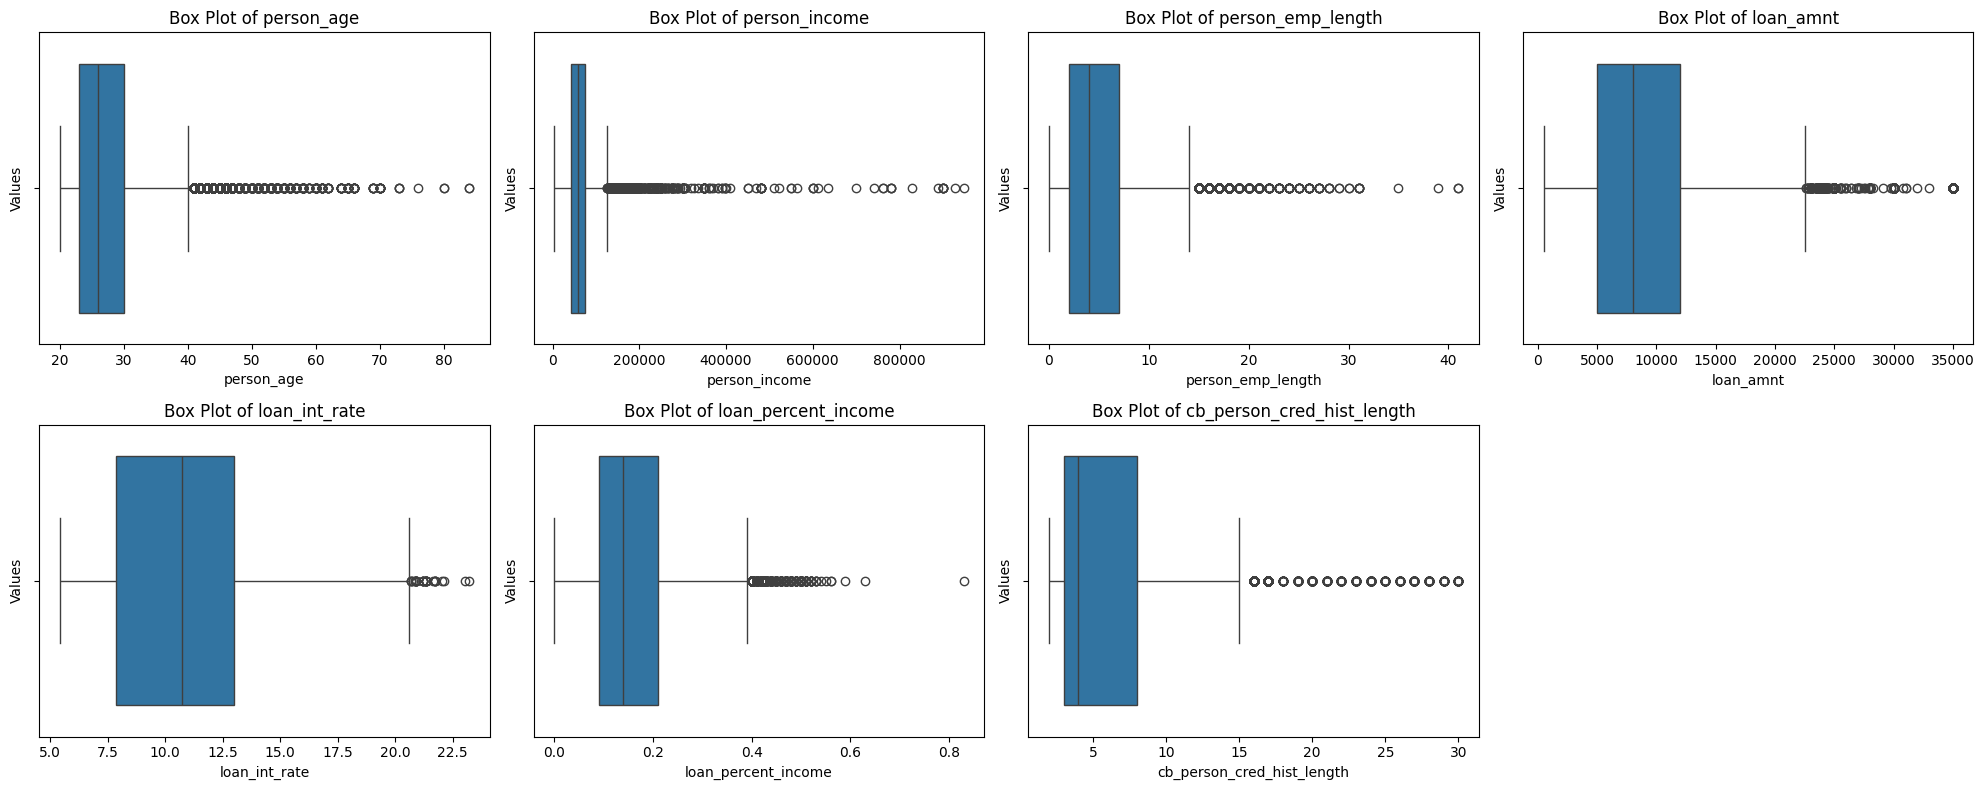

In [200]:
# Function to plot box plots for numerical columns
def plot_box_plots(df, boxplot_columns):
    num_plots = len(boxplot_columns)
    num_cols = 4
    num_rows = (num_plots + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(boxplot_columns):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(f'Box Plot of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Values')

    # Hide any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Identify numerical columns
boxplot_columns = [col for col in df.columns if df[col].dtype in ['int64', 'float64'] and col != 'id']
boxplot_columns.remove('loan_status')  # Remove the target column

# Plot box plots for numerical columns
plot_box_plots(df, boxplot_columns)

Findings from the box plots:
- Much of our learning here mirrors similar finidings from the histograms above. However we can see the outliers much more clearly.

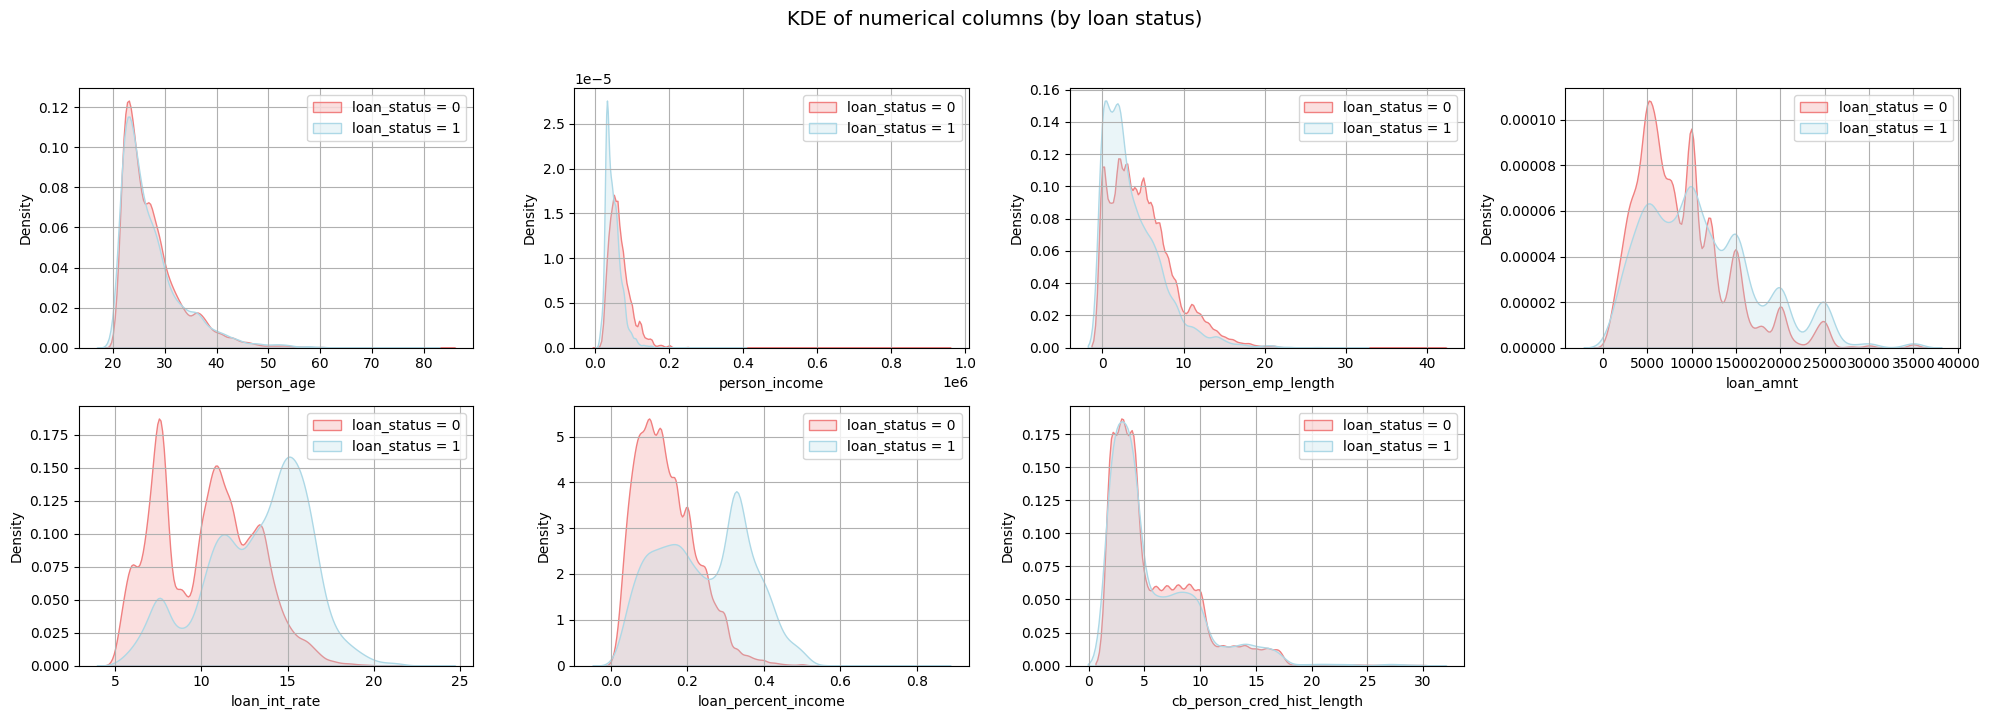

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_kde_by_loan_status(df, numerical_cols, loan_status_col):
    numerical_cols = [col for col in numerical_cols if col != loan_status_col]
    """
    Plots Kernel Density Estimate (KDE) for numerical columns,
    grouped by the `loan_status` column, arranged in a grid with 4 columns.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        numerical_cols (list): List of numerical column names to plot.
        loan_status_col (str): Name of the column containing loan status.
    """
    # Get unique loan statuses
    loan_statuses = df[loan_status_col].unique()

    # Define custom colors for loan_status values
    status_colors = {0: 'lightcoral', 1: 'lightblue'}  # Light blue for 0, light red for 1

    # Calculate the number of rows needed for the grid
    num_plots = len(numerical_cols)
    num_cols = 4  # Set grid columns to 4
    num_rows = (num_plots + num_cols - 1) // num_cols  # Ensure enough rows for 4 columns

    # Create a figure with subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 3.5 * num_rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    # Iterate over each numerical column
    for i, col in enumerate(numerical_cols):
        for status in loan_statuses:
            # Filter data for the current loan status
            subset = df[df[loan_status_col] == status][col].dropna()
            
            # Plot the KDE on the corresponding subplot with custom colors
            sns.kdeplot(
                subset,
                label=f"{loan_status_col} = {status}",
                fill=True,  # Fill the area under the curve
                color=status_colors[status],  # Use custom colors based on loan_status
                ax=axes[i]  # Plot on the i-th subplot
            )

        # Add labels and legend to the subplot
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Density")
        axes[i].legend()
        axes[i].grid(True)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    # Add a single title for the whole grid
    fig.suptitle('KDE of numerical columns (by loan status)', fontsize=14, y=1.02)

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Call the function
plot_kde_by_loan_status(df, numerical_columns, 'loan_status')

Findings from density plot of numerical columns:
- Loan status does not seem to vary with age and credit history length
- Lower ranges of income and employement length seems to have higher approval
- Higher loan amount, interest rate and loan percent of income seems to have higher approvals

#### Analysis of categorical variables

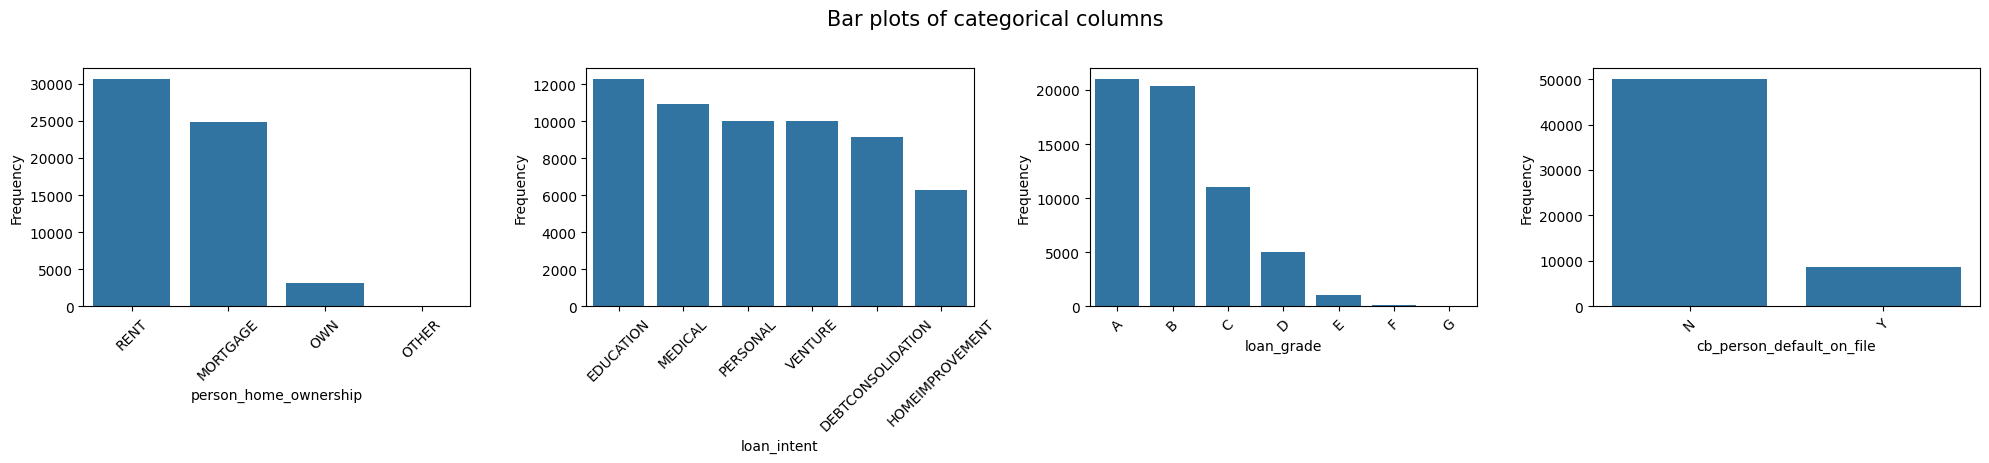

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate categorical columns
categorical_columns = [col for col in df.columns if df[col].dtype == 'object' and col != 'id']

# Calculate the number of rows and columns for the grid
num_plots = len(categorical_columns)
num_cols = 4  # Number of columns in the grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create a grid of subplots with reduced row height
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4.5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot bar plots for categorical columns (flipped axes)
for i, column in enumerate(categorical_columns):
    ax = axes[i]
    sns.countplot(x=df[column], order=df[column].value_counts().index, ax=ax)  # Use `x` for horizontal bars
    # ax.set_title(f'Bar Plot of {column}')
    ax.set_xlabel(column)  # Swap x and y labels
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels by 45 degrees

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Bar plots of categorical columns', fontsize=15, y=1.02)

plt.tight_layout()
plt.show()

Findings from bar plots:
- Home ownership: Rent and Mortgage are most common modes of living
- Loan intent: Loans are taken in large number across almost all categories
- Loan grade: Low risk loans (A, B, C) are more in number than high risk loans (D and above)
- Default on file: Applicants who have a record of default (N) outweigh defaulters (Y) by almost a 5:1 ratio 

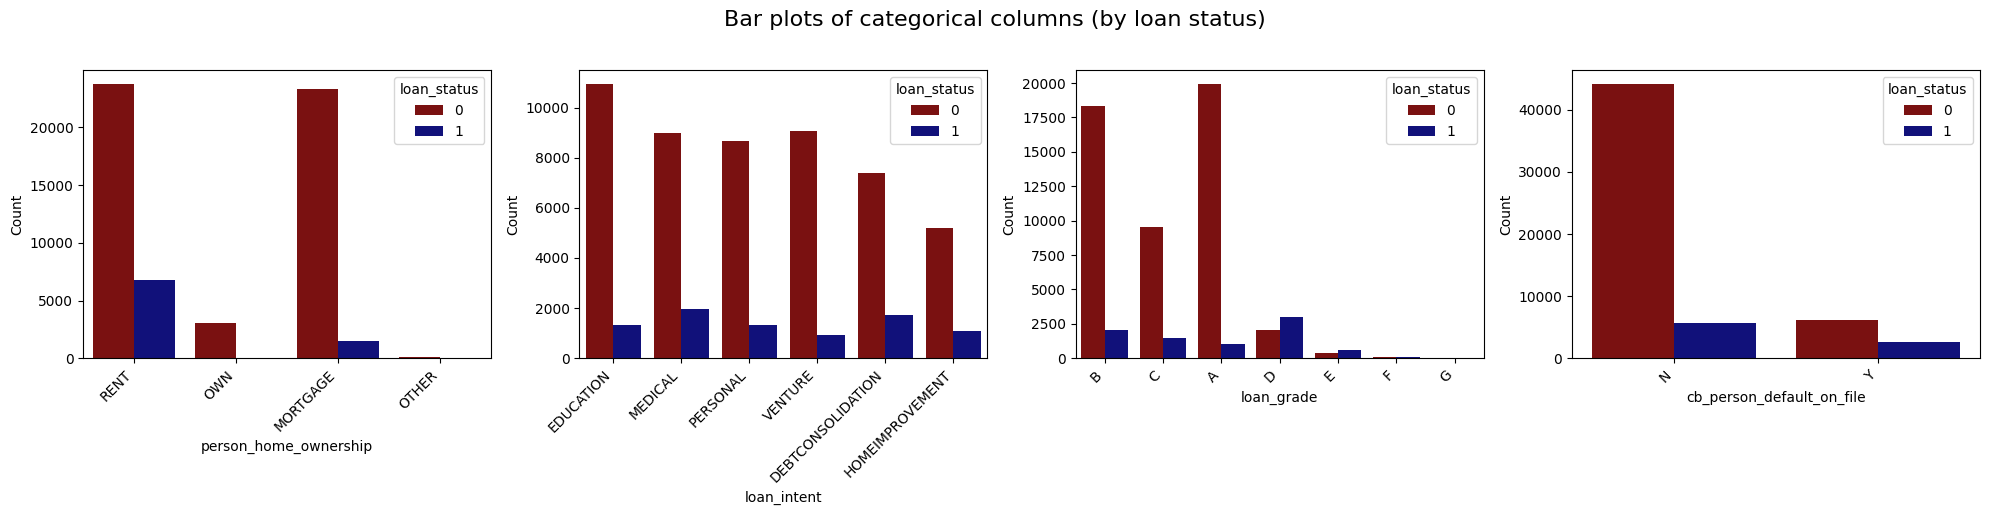

In [203]:
# Total number of plots
num_plots = len(categorical_columns)
num_cols = 4
num_rows = (num_plots + num_cols - 1) // num_cols

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()

# Define custom colors
palette = {0: '#8B0000', 1: '#00008B'}

# Plot count plots for each categorical column
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, hue='loan_status', palette=palette, ax=axes[i])
    # axes[i].set_title(f'Loan Default Rate by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='loan_status')
    plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right')  # Set x-tick labels to 45 degrees

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Bar plots of categorical columns (by loan status)', fontsize=16, y=1.02)

plt.tight_layout()
plt.show()

Finidings:
- Home ownership: Approval rates seem to be higher for people who pay rent compared to those who pay mortgage
- Loan intent: Despite being the most common mode of loan intent, education does not have the highest approval rates. Medical and debt consolidation modes have more approvals
- Loan grade: Despite a lot of loans being low risk, most of them are denied. High risk loans have higher approvals. This could be attributed to possible high interest rates assoicated with these loans.
- Default on file: The ratio of denial to approval within non-defaulters and defaulters are highly varied.

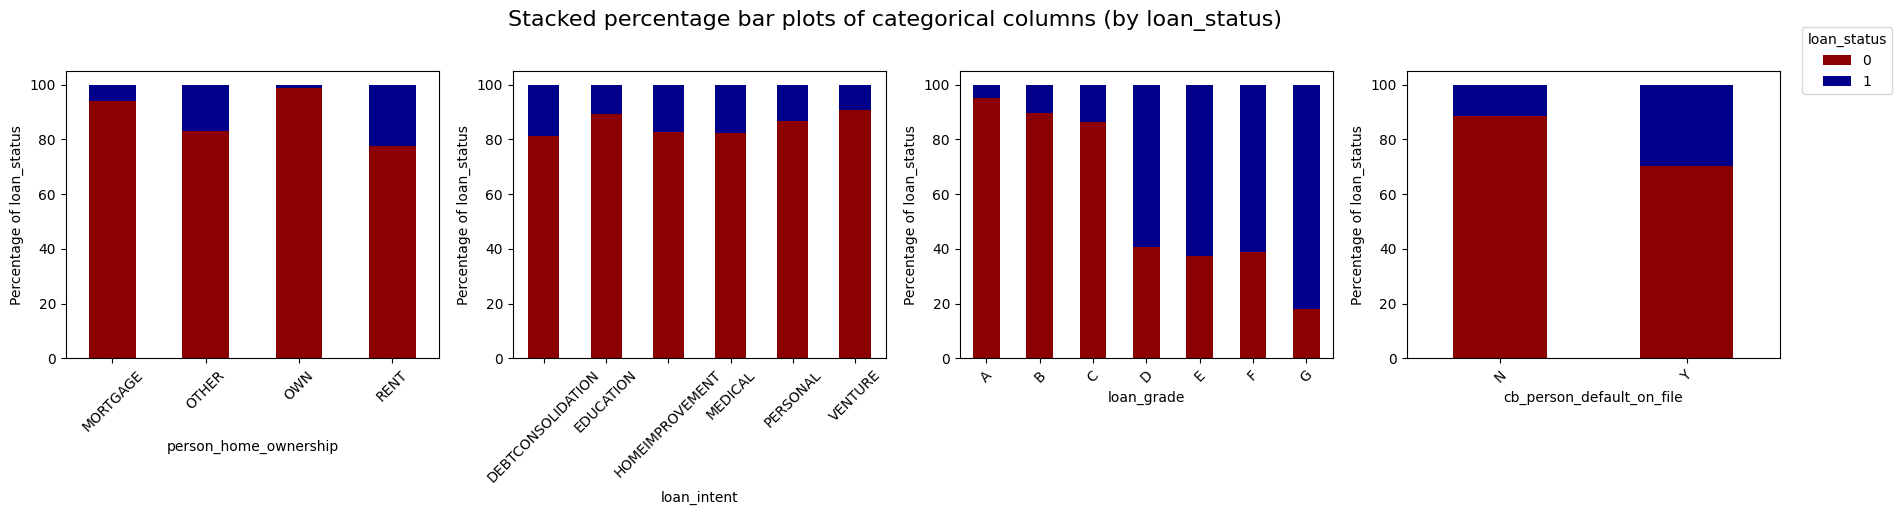

In [204]:
# Define custom darker colors
colors = ['#8B0000', '#00008B']  # Dark red and dark blue

num_plots = len(categorical_columns)
num_cols = 4  # Number of columns in the grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot stacked percentage bar plots for each column
for i, x_col in enumerate(categorical_columns):
    # Create a crosstab to get the percentages
    crosstab = pd.crosstab(df[x_col], df['loan_status'], normalize='index') * 100

    # Plot the stacked percentage bar plot
    crosstab.plot(kind='bar', stacked=True, ax=axes[i], color=colors, legend=False)

    # Add labels and customize the subplot
    axes[i].set_xlabel(x_col)
    axes[i].set_ylabel(f'Percentage of {'loan_status'}')
    axes[i].xaxis.set_tick_params(rotation=45)
    axes[i].grid(False)  # Remove grid lines

# Place the legend outside the plot
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='loan_status', loc='upper left', bbox_to_anchor=(1, 1))

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a single title for the whole grid
fig.suptitle(f'Stacked percentage bar plots of categorical columns (by {'loan_status'})', fontsize=16, y=1.02)

plt.tight_layout()
plt.show()

Findings:
- A lot of the previous findings can be seen reflected well in the stacked percentage bar chart
- Especially, the demographic of approval and denial among loan grade and person default on file

In [205]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Chart 1: Loan Intent
counts_loan_intent = df['loan_intent'].value_counts().reset_index()
counts_loan_intent.columns = ['loan_intent', 'count']

fig1 = px.pie(
    counts_loan_intent,
    names='loan_intent',
    values='count',
    title="Pie Chart of Loan Intent",
    hole=0.3,
    labels={'loan_intent': 'Loan Intent'},
)

fig1.update_traces(
    textposition='inside',
    textinfo='label+percent',
)

# Chart 2: Home Ownership
counts_home_ownership = df['person_home_ownership'].value_counts().reset_index()
counts_home_ownership.columns = ['person_home_ownership', 'count']

fig2 = px.pie(
    counts_home_ownership,
    names='person_home_ownership',
    values='count',
    title="Pie Chart of Home Ownership",
    labels={'person_home_ownership': 'Home Ownership'},
)

fig2.update_traces(
    textposition='inside',
    textinfo='label+percent',
    hovertemplate='<b>%{label}</b><br>Count: %{value}<br>Percentage: %{percent}</br>',
)

# Create a subplot grid with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'pie'}, {'type': 'pie'}]])

# Add Chart 1 to the first column
fig.add_trace(fig1.data[0], row=1, col=1)

# Add Chart 2 to the second column
fig.add_trace(fig2.data[0], row=1, col=2)

# Update layout for the combined figure
fig.update_layout(
    title_text="Distribution of loan intent and home ownership",  # Overall title
    width=1200,  # Adjust width to fit both charts
    height=600,  # Adjust height
    showlegend=False,  # Hide legend
)

# Show the combined plot
fig.show()

Findings:
- Distribution of loan intent clearly portrays that our previous finding of all almost categories being equally prevalent. Except for the least common home improvement which is almost half the top most Education category.
- Distribution of the home ownership category tells us that OWN is only just 10% of the top category RENT and OTHER is a negligible 0.15%

In [206]:
import pandas as pd
import plotly.express as px

# Specify the columns for the sunburst chart
parent_column = 'loan_grade'  # Replace with your parent column name
child_column = 'person_home_ownership'  # Replace with your child column name

# Group the data by the parent and child columns and count occurrences
grouped_df = (
    df.groupby([parent_column, child_column])
    .size()
    .reset_index(name='count')
)

# Calculate the total count
total_count = grouped_df['count'].sum()

# Add a new column for percentages
grouped_df['percentage'] = (grouped_df['count'] / total_count) * 100

# Create the sunburst chart using percentages
fig = px.sunburst(
    grouped_df,
    path=[parent_column, child_column],  # Hierarchical structure
    values='percentage',                # Use percentages for segment sizes
    title="Sunburst Chart (Percentages)"
)

# Customize hover text to show only percentages
fig.update_traces(
    hovertemplate=(
        "<b>%{label}</b><br>" +
        "Percentage: %{value:.2f}%<extra></extra>"
    )
)

# Increase the figure size
fig.update_layout(
    width=650,   # Width of the figure in pixels
    height=650   # Height of the figure in pixels
)

# Show the plot
fig.show()

Findings from the sunburst chart:
- RENT is the most common mode of housing in almost all categories of loan grade except for A which comprises of loans with the least risk.
- Despite OWN form of housing being only 5% of the total data, it is present in all modes of loan grade.

In [207]:
import pandas as pd

# Specify the columns for which you want to print unique values
columns_to_check = ['person_home_ownership', 'loan_grade', 'cb_person_default_on_file']

# Print unique values for each column
print("Unique Values for Each Column:")
for column in columns_to_check:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

Unique Values for Each Column:
person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_grade: ['B' 'C' 'A' 'D' 'E' 'F' 'G']
cb_person_default_on_file: ['N' 'Y']


#### Encode categorical variables

In [208]:
dff = df.copy()

In [209]:
from sklearn.preprocessing import LabelEncoder

# Specify the columns to encode
columns_to_encode = ['person_home_ownership', 'loan_grade', 'cb_person_default_on_file']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to each column
for column in columns_to_encode:
    dff[column] = label_encoder.fit_transform(dff[column])

# Display the updated DataFrame
print("DataFrame after Label Encoding:")
dff.head()

DataFrame after Label Encoding:


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,3,0.0,EDUCATION,1,6000,11.49,0.17,0,14,0
1,1,22,56000,2,6.0,MEDICAL,2,4000,13.35,0.07,0,2,0
2,2,29,28800,2,8.0,PERSONAL,0,6000,8.90,0.21,0,10,0
3,3,30,70000,3,14.0,VENTURE,1,12000,11.11,0.17,0,5,0
4,4,22,60000,3,2.0,MEDICAL,0,6000,6.92,0.10,0,3,0


#### Correlation Matrix

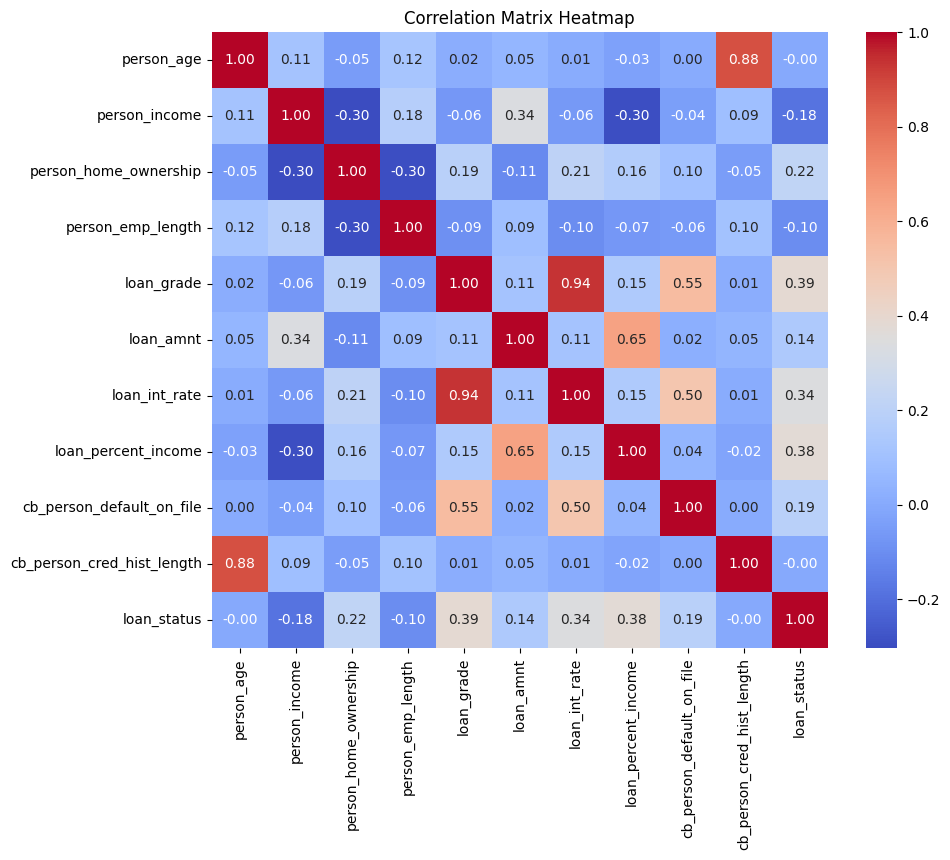

In [210]:
numerical_columns_2 = [col for col in dff.columns if dff[col].dtype in ['int64', 'float64'] and col != 'id']

# Filter the DataFrame to include only numerical columns
dff_numerical_2 = dff[numerical_columns_2]

# Compute the correlation matrix
corr_matrix_2 = dff_numerical_2.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(corr_matrix_2, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

Findings from the correlation matrix:
- The correlation matrix proves many of our insights from previous visualizations.
- The last row corresponding to loan_status has positive correlation values for loan grade, interest amount and percent of income. This correlates to our findings from the density plot above.
-  Another finding from our density plot was that lower income and employment length has higher approvals. This is evident from the negative correlation values associated with these variables and the loan status.
- Person default on file and home ownership seems to have positive correlation values with loan status.

- One of the most important findings is that loan grade and interest ratio having one of the highest correlation values of a positive 0.94. This proves our assumption that high risk loans are more likely to be approved due to the high interest rates associated with them.
- Another interesting finding is that, high approval rates were found for defaulters compared to non-defaulters and the matrix above has a positive 0.55 and 0.50 values for loan grade and interest rate respectively associated with default on file.

#### Insights that relate back to the problem
- So having a good credit history didn't seem to matter much in general for an approval.
- But approvals in such cases mostly depends on the interest rate being high.
- If you pay rent, there is a better shot at loan approval than living by paying mortgage or owning the house in general. But again it depends on various other factors.
- Surprisingly defaulters who are very likely to have high interest rates have more approvals than non-defaulters